# Passo 1 - Análise do panorama geral

1. **Abordar o problema:**
    O problema proposto envolve a análise de falhas em motores elétricos industriais. O objetivo do projeto é propor um classificador de falhas dos equipamentos com o intuito de melhorar o planejameneto e otimizar os processos de manutenção.
     
2. **Medida de desempenho:**
    Para a análise inicial do problema, irá ser utilizado o recall (sensibilidade) e a acurácia (accuracy). O recall irá analisar a proporção de verdadeiros positivos em relação ao total de instâncias positivas reais. Isso é feito com o foco em que devemos ter o mínimo de casos de falso negativo para o rótulo "Normal", ou seja, evitar a indicação de situação normal, quando há falha.
    A acurácia, indicará, para as demais classificações, a quantidade de acertos gerais, não dando importância em especial para nenhum dos tipos de erro, como falsos positivos e falsos negativos. Esta métrica é escolhida, neste caso, pois dentro das falhas, entende-se que quanto melhor for o desempenho para identificar o tipo específico de falha, processos e esforços de manutenção podem ser direcionados, sem a necessidade de investir tempo no diagnóstico do tipo de falha.
     
3. **Verificação de hipótese:**
    A vibração pode acabar indicando mais o desbalanceamneto e o desalinhamento.
    Já o pico de corrente pode indicar a sobrecarga e desacoplado (girando livre);

# Passo 2 - Carregando os Dados para análise

1. Carrega-se os dados a partir de um arquivo csv;
2. Verifica-se os valores, tipos e estruturas dos dados;
3. Verificar os dados faltantes e balanceamento.

In [1]:
# Importando as bibliotecas necessárias para atuar agora na obtenção dos dados

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Adotando a função read_csv da biblioteca pandas para ler arquivo .csv de dados 
motores = pd.read_csv('Dataset APS1_Sinais Eletricos e Vibracao_csv.xls')

In [3]:
# Exibindo os dados carregado
motores

tempo_s  tipo_setup  I_entrada_A  P_entrada_W  I_saida_A  \
0        0.00         0.0      0.44905     63.67320    1.43660   
1        0.08         0.0      0.44610     69.40320    1.67860   
2        0.16         0.0      0.45175     69.11385    1.39950   
3        0.24         0.0      0.43510     68.85665    1.39705   
4        0.32         0.0      0.45055     70.52860    1.43375   
...       ...         ...          ...          ...        ...   
2500    39.68         4.0      0.46575     68.42795    1.59235   
2501    39.76         4.0      0.44705     62.32815    1.57365   
2502    39.84         4.0      0.47110     76.04075    1.77275   
2503    39.92         4.0      0.47745     72.86850    1.39700   
2504    40.00         4.0      0.48705     70.70715    1.51215   

      DesvPad_I_entrada_A  DesvPad _P_entrada_W  DesvPad _I_saida_A  \
0                0.042740             21.869566            0.113479   
1                0.048945              1.600020            0.854342   
2                0.042337              5.220348            0.284000   
3                0.063224              3.437546            0.219507   
4                0.048497              1.240032            0.111967   
...                   ...                   ...                 ...   
2500             0.042147              8.058820            0.900427   
2501             0.068987             15.876663            0.904702   
2502             0.045194             34.799709            1.657858   
2503             0.043033              0.826486            0.131019   
2504             0.114987             12.366981            0.514260   

      Amp_I_entrada_A  Amp_P_entrada_W  Amp_I_saida_A  Kurtosis_I_entrada_A  \
0               0.175           91.738          0.406             12.474475   
1               0.227            7.359          3.843             20.070610   
2               0.207           24.185          1.395             19.087723   
3               0.228           16.040          0.973              6.869051   
4               0.222            4.394          0.425             20.205840   
...               ...              ...            ...                   ...   
2500            0.199           37.403          4.276              5.486469   
2501            0.231           62.159          4.218              5.237910   
2502            0.191          184.906          7.810              9.874863   
2503            0.194            2.893          0.383             21.320253   
2504            0.608           41.761          2.476             10.119385   

      Kurtosis_P_entrada_W  Kurtosis_I_saida_A  Mag_S1_f1_dBrms  \
0                15.435837            4.223108       -50.647991   
1                13.335535           16.966677       -50.696943   
2                 7.345771           11.032327       -47.724322   
3                19.849528            9.136137       -47.652608   
4                 2.325535            2.818658       -47.019446   
...                    ...                 ...              ...   
2500             22.266532           21.582764       -33.195195   
2501             11.518238           21.593782       -33.360763   
2502             20.660427            6.075266       -33.497896   
2503              2.327027            1.904577       -33.581380   
2504              6.899001           20.098625       -33.599577   

      Mag_S1_f2_dBrms  Mag_S1_f3_dBrms  Mag_S2_f1_dBrms  Mag_S2_f2_dBrms  \
0          -63.189443       -47.864704       -59.629807       -73.010381   
1          -63.340003       -48.313132       -59.591150       -72.360239   
2          -62.837371       -48.384219       -55.194912       -63.127903   
3          -62.613368       -48.768793       -55.275822       -63.310116   
4          -61.314274       -49.016646       -54.665312       -60.825200   
...               ...              ...              ...              ...   
2500       -52.502279       -41.610532       -37.874381       -49.147213  

In [4]:
# Verificar dimensões do dataframe (nro de linhas e colunas)
motores.shape

(2505, 20)

In [5]:
# Verificar informações gerais do dataset (nro de colunas, nomes, quantidade e tipo de dados)
motores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tempo_s               2505 non-null   float64
 1   tipo_setup            2505 non-null   float64
 2   I_entrada_A           2505 non-null   float64
 3   P_entrada_W           2505 non-null   float64
 4   I_saida_A             2505 non-null   float64
 5   DesvPad_I_entrada_A   2505 non-null   float64
 6   DesvPad _P_entrada_W  2505 non-null   float64
 7   DesvPad _I_saida_A    2505 non-null   float64
 8   Amp_I_entrada_A       2505 non-null   float64
 9   Amp_P_entrada_W       2505 non-null   float64
 10  Amp_I_saida_A         2505 non-null   float64
 11  Kurtosis_I_entrada_A  2505 non-null   float64
 12  Kurtosis_P_entrada_W  2505 non-null   float64
 13  Kurtosis_I_saida_A    2505 non-null   float64
 14  Mag_S1_f1_dBrms       2505 non-null   float64
 15  Mag_S1_f2_dBrms      

In [6]:
# Verificar valores faltantes (não nulos)
motores.isnull().sum()

tempo_s                 0
tipo_setup              0
I_entrada_A             0
P_entrada_W             0
I_saida_A               0
DesvPad_I_entrada_A     0
DesvPad _P_entrada_W    0
DesvPad _I_saida_A      0
Amp_I_entrada_A         0
Amp_P_entrada_W         0
Amp_I_saida_A           0
Kurtosis_I_entrada_A    0
Kurtosis_P_entrada_W    0
Kurtosis_I_saida_A      0
Mag_S1_f1_dBrms         0
Mag_S1_f2_dBrms         0
Mag_S1_f3_dBrms         0
Mag_S2_f1_dBrms         0
Mag_S2_f2_dBrms         0
Mag_S2_f3_dBrms         0
dtype: int64

In [7]:
# Verificar balanceamento do dataset (qtde de cada classe)
motores['tipo_setup'].value_counts()

#Exibi-se o histograma das classes, contudos deixamos oculto, pois é possível observar que está 100% balanceado entre os tipos
# motores.tipo_setup.hist()

0.0    501
1.0    501
2.0    501
3.0    501
4.0    501
Name: tipo_setup, dtype: int64

In [8]:
# Modificando os valores do tipo_setup, de número para texto descritivo
motores['tipo_setup'] = motores['tipo_setup'].map({0.0: 'Normal', 1.0: 'Desacoplado', 2.0: 'Sobrecarga', 3.0: 'Desbalanceado', 4.0: 'Desalinhado'})
motores

tempo_s   tipo_setup  I_entrada_A  P_entrada_W  I_saida_A  \
0        0.00       Normal      0.44905     63.67320    1.43660   
1        0.08       Normal      0.44610     69.40320    1.67860   
2        0.16       Normal      0.45175     69.11385    1.39950   
3        0.24       Normal      0.43510     68.85665    1.39705   
4        0.32       Normal      0.45055     70.52860    1.43375   
...       ...          ...          ...          ...        ...   
2500    39.68  Desalinhado      0.46575     68.42795    1.59235   
2501    39.76  Desalinhado      0.44705     62.32815    1.57365   
2502    39.84  Desalinhado      0.47110     76.04075    1.77275   
2503    39.92  Desalinhado      0.47745     72.86850    1.39700   
2504    40.00  Desalinhado      0.48705     70.70715    1.51215   

      DesvPad_I_entrada_A  DesvPad _P_entrada_W  DesvPad _I_saida_A  \
0                0.042740             21.869566            0.113479   
1                0.048945              1.600020            0.854342   
2                0.042337              5.220348            0.284000   
3                0.063224              3.437546            0.219507   
4                0.048497              1.240032            0.111967   
...                   ...                   ...                 ...   
2500             0.042147              8.058820            0.900427   
2501             0.068987             15.876663            0.904702   
2502             0.045194             34.799709            1.657858   
2503             0.043033              0.826486            0.131019   
2504             0.114987             12.366981            0.514260   

      Amp_I_entrada_A  Amp_P_entrada_W  Amp_I_saida_A  Kurtosis_I_entrada_A  \
0               0.175           91.738          0.406             12.474475   
1               0.227            7.359          3.843             20.070610   
2               0.207           24.185          1.395             19.087723   
3               0.228           16.040          0.973              6.869051   
4               0.222            4.394          0.425             20.205840   
...               ...              ...            ...                   ...   
2500            0.199           37.403          4.276              5.486469   
2501            0.231           62.159          4.218              5.237910   
2502            0.191          184.906          7.810              9.874863   
2503            0.194            2.893          0.383             21.320253   
2504            0.608           41.761          2.476             10.119385   

      Kurtosis_P_entrada_W  Kurtosis_I_saida_A  Mag_S1_f1_dBrms  \
0                15.435837            4.223108       -50.647991   
1                13.335535           16.966677       -50.696943   
2                 7.345771           11.032327       -47.724322   
3                19.849528            9.136137       -47.652608   
4                 2.325535            2.818658       -47.019446   
...                    ...                 ...              ...   
2500             22.266532           21.582764       -33.195195   
2501             11.518238           21.593782       -33.360763   
2502             20.660427            6.075266       -33.497896   
2503              2.327027            1.904577       -33.581380   
2504              6.899001           20.098625       -33.599577   

      Mag_S1_f2_dBrms  Mag_S1_f3_dBrms  Mag_S2_f1_dBrms  Mag_S2_f2_dBrms  \
0          -63.189443       -47.864704       -59.629807       -73.010381   
1          -63.340003       -48.313132       -59.591150       -72.360239   
2          -62.837371       -48.384219       -55.194912       -63.127903   
3          -62.613368       -48.768793       -55.275822       -63.310116   
4          -61.314274       -49.016646       -54.665312       -60.825200   
...               ...              ...              ...              ...   
2500       -52.502279       -41.610532       -37.874381       

In [9]:
# Tendo essa modificação nos valores, decidiu-se verificar o tipo da nova informção
motores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2505 entries, 0 to 2504
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   tempo_s               2505 non-null   float64
 1   tipo_setup            2505 non-null   object 
 2   I_entrada_A           2505 non-null   float64
 3   P_entrada_W           2505 non-null   float64
 4   I_saida_A             2505 non-null   float64
 5   DesvPad_I_entrada_A   2505 non-null   float64
 6   DesvPad _P_entrada_W  2505 non-null   float64
 7   DesvPad _I_saida_A    2505 non-null   float64
 8   Amp_I_entrada_A       2505 non-null   float64
 9   Amp_P_entrada_W       2505 non-null   float64
 10  Amp_I_saida_A         2505 non-null   float64
 11  Kurtosis_I_entrada_A  2505 non-null   float64
 12  Kurtosis_P_entrada_W  2505 non-null   float64
 13  Kurtosis_I_saida_A    2505 non-null   float64
 14  Mag_S1_f1_dBrms       2505 non-null   float64
 15  Mag_S1_f2_dBrms      

# Passo 3 - Exploração de dados
Nesse ponto será possível visualizar os dados e analisá-los, para conseguir observar, quais são as informações mais relevantes que devem ser analisadas no modelo de aprendizado de máquina.

In [10]:
# Matriz de correlação - verificar relação de features para redundância ou irrelevância
correlation_matrix = motores.corr(numeric_only=True)
print(correlation_matrix)

                       tempo_s  I_entrada_A  P_entrada_W  I_saida_A  \
tempo_s               1.000000     0.045726     0.038066   0.043147   
I_entrada_A           0.045726     1.000000     0.719286  -0.009146   
P_entrada_W           0.038066     0.719286     1.000000   0.011448   
I_saida_A             0.043147    -0.009146     0.011448   1.000000   
DesvPad_I_entrada_A   0.004640    -0.283939    -0.032126   0.035570   
DesvPad _P_entrada_W -0.009564     0.027581    -0.232482   0.018817   
DesvPad _I_saida_A   -0.030776    -0.000582     0.004686   0.608378   
Amp_I_entrada_A       0.008190    -0.234529    -0.030039   0.036167   
Amp_P_entrada_W      -0.002617     0.029099    -0.197346   0.020772   
Amp_I_saida_A        -0.030248     0.000591     0.008355   0.491845   
Kurtosis_I_entrada_A  0.023485     0.045065    -0.009965   0.022333   
Kurtosis_P_entrada_W -0.000098    -0.021274    -0.066356   0.020482   
Kurtosis_I_saida_A   -0.007641     0.001925     0.012752   0.298787   
Mag_S1

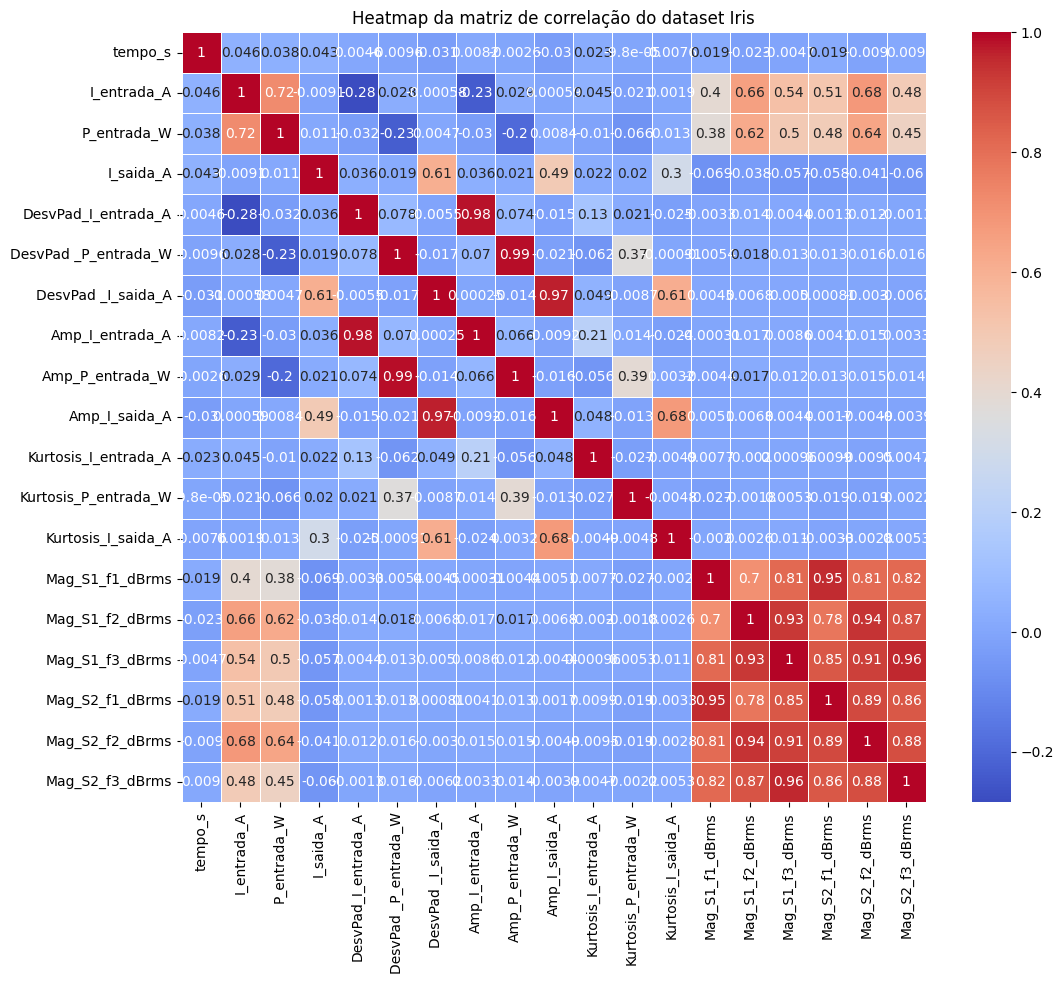

In [11]:
# Para obter uma análise mais visual, utiliza-se o heatmap da matriz de correlação

import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap da matriz de correlação do dataset Iris')
plt.show()

 A partir da matriz acima, podemos reparar que os desvios padrões e as amplitudes tem uma correlação alta, com isso, será realizado uma análise para julgar como que observamos esses dados em relação aos tipo_setup (rótulos)

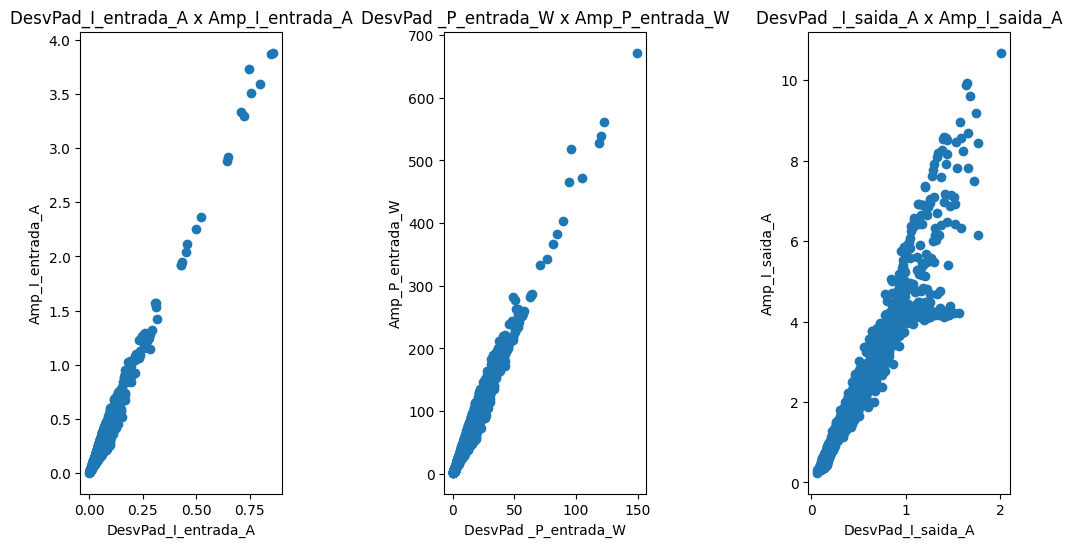

In [12]:
# Utiliza-se o pairplot (gráfico de pares) de pares de atributos e especiesar ver a disperção
fig, axs = plt.subplots(1, 3, figsize=(12,6))
fig.subplots_adjust(wspace=0.8)

# DesvPad_I_entrada_A - Amp_I_entrada_A
# DesvPad _P_entrada_W - Amp_P_entrada_W
# DesvPad _I_saida_A - Amp_I_saida_A

# linha 0, coluna 0
axs[0].scatter(motores['DesvPad_I_entrada_A'], motores['Amp_I_entrada_A'])
axs[0].set_title('DesvPad_I_entrada_A x Amp_I_entrada_A')
axs[0].set_xlabel('DesvPad_I_entrada_A')
axs[0].set_ylabel('Amp_I_entrada_A')

# linha 0, coluna 1
axs[1].scatter(motores['DesvPad _P_entrada_W'], motores['Amp_P_entrada_W'])
axs[1].set_title('DesvPad _P_entrada_W x Amp_P_entrada_W')
axs[1].set_xlabel('DesvPad _P_entrada_W')
axs[1].set_ylabel('Amp_P_entrada_W')

# linha 0, coluna 2
axs[2].scatter(motores['DesvPad _I_saida_A'], motores['Amp_I_saida_A'])
axs[2].set_title('DesvPad _I_saida_A x Amp_I_saida_A')
axs[2].set_xlabel('DesvPad_I_saida_A')
axs[2].set_ylabel('Amp_I_saida_A')

plt.show()

Apesar de ser possível verificar a disperção dos pontos, será realizado um pairplot para identificar os pontos de dados pelos rótulos e identificar se há alguma tendência de concentração.

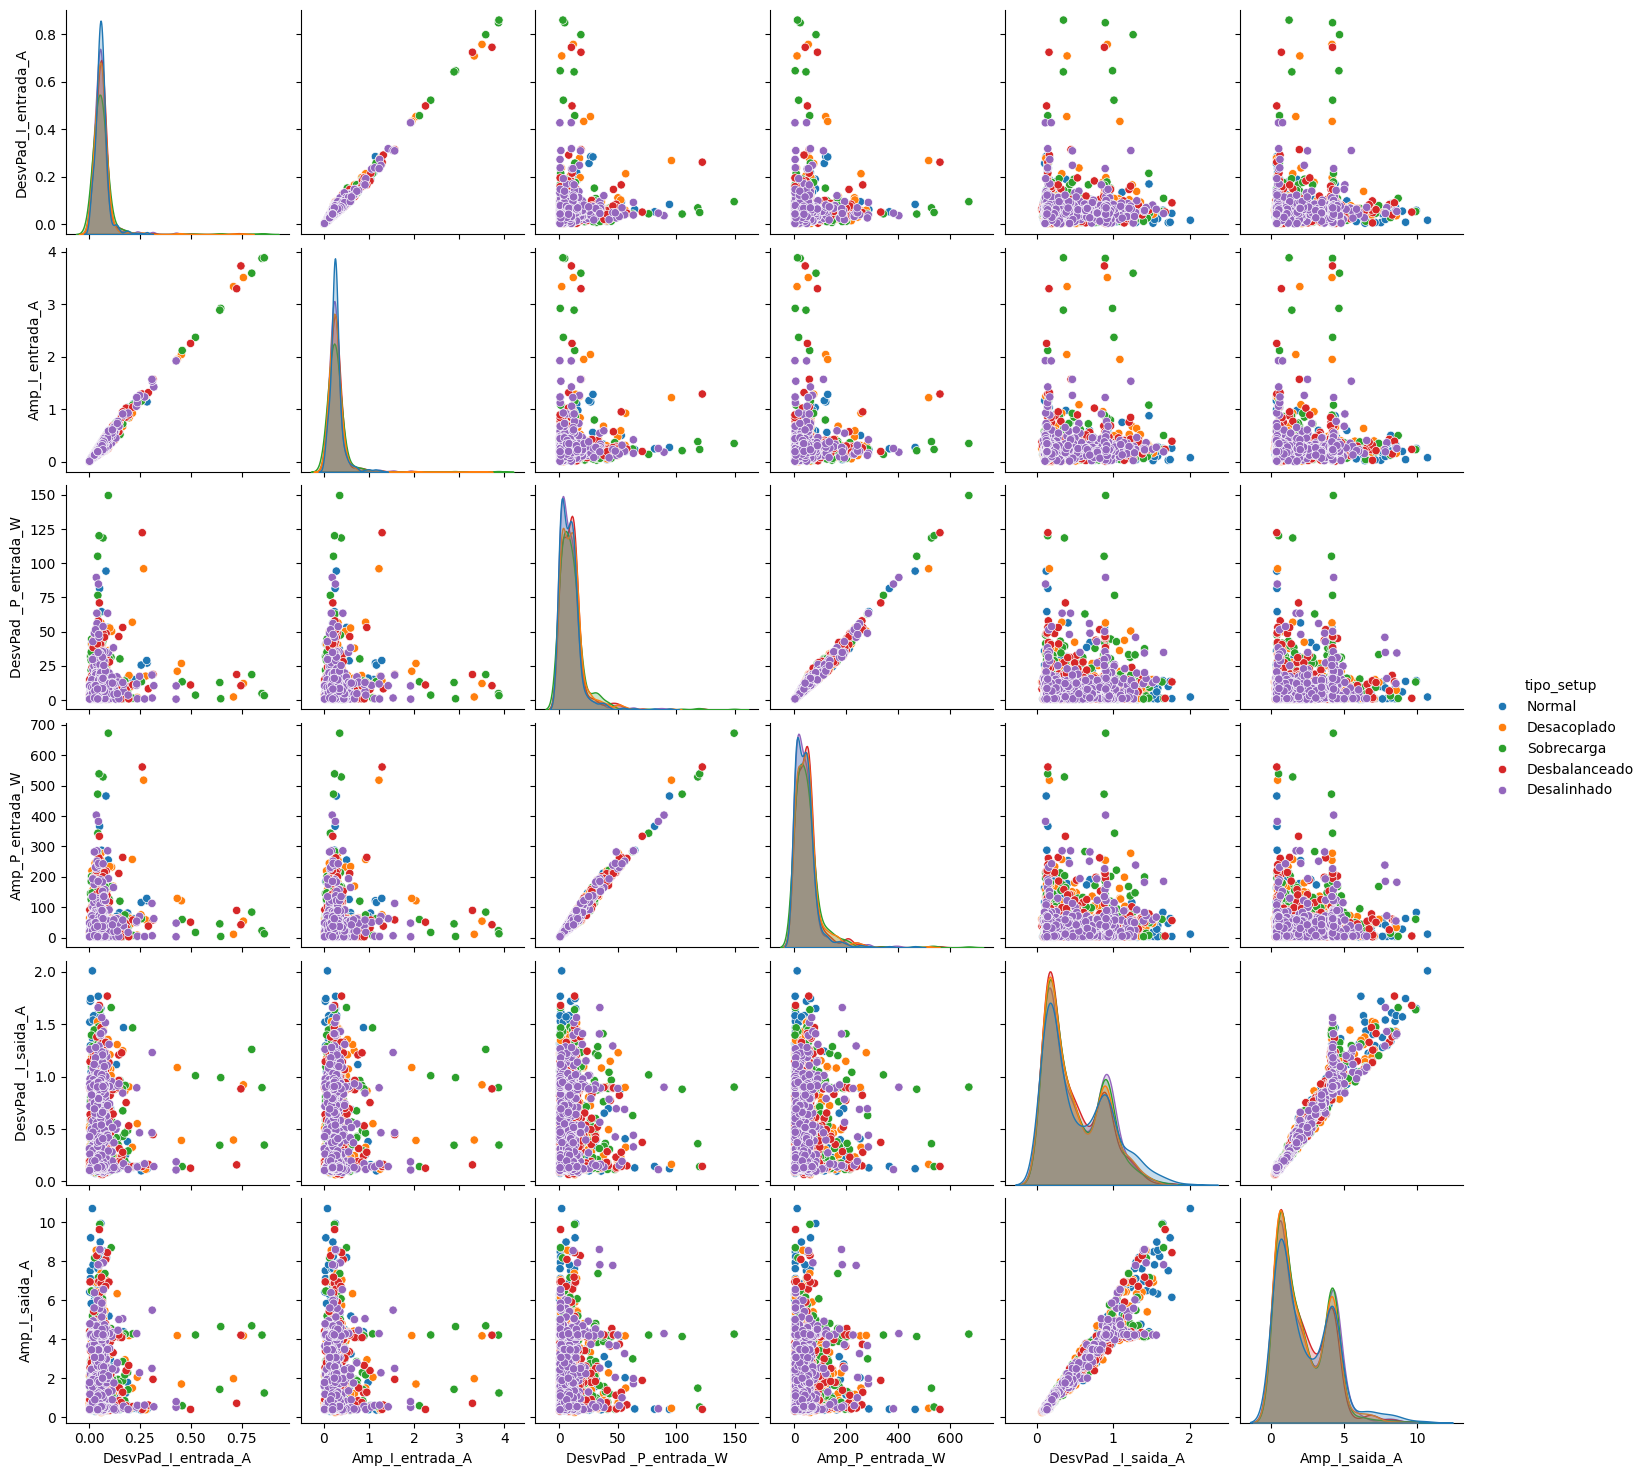

In [13]:
# Pairplot (gráfico de pares) de pares de atributos e especies

motores2 = motores[['tipo_setup', 'DesvPad_I_entrada_A', 'Amp_I_entrada_A', 'DesvPad _P_entrada_W', 'Amp_P_entrada_W', 'DesvPad _I_saida_A', 'Amp_I_saida_A']]
sns.pairplot(motores2, hue='tipo_setup')
plt.show()

Não observamos uma tendencia muito forte para diferenciar os tipos de setup, ou seja, com isso iremos descartar um dos atributos relacionados logo acima.

Um outro ponto importante, é notar que não iremos cortar um sensor com isso, dessa forma, voltamos a matriz de correlação e percebe-se que há uma correlação maior com a corrente de entrada com a potência de entrada. Dessa forma será replicado o método realizado acima para essas métricas avaliando o corte de um sensor.

Text(0, 0.5, 'P_entrada_W')

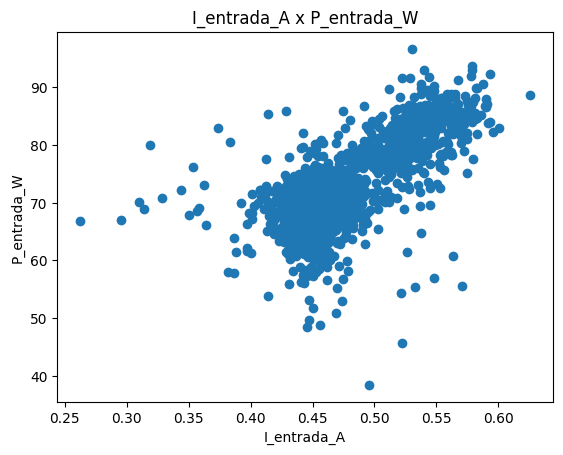

In [14]:
# I_entrada_A	P_entrada_W

plt.scatter(motores['I_entrada_A'], motores['P_entrada_W'])
plt.title('I_entrada_A x P_entrada_W')
plt.xlabel('I_entrada_A')
plt.ylabel('P_entrada_W')

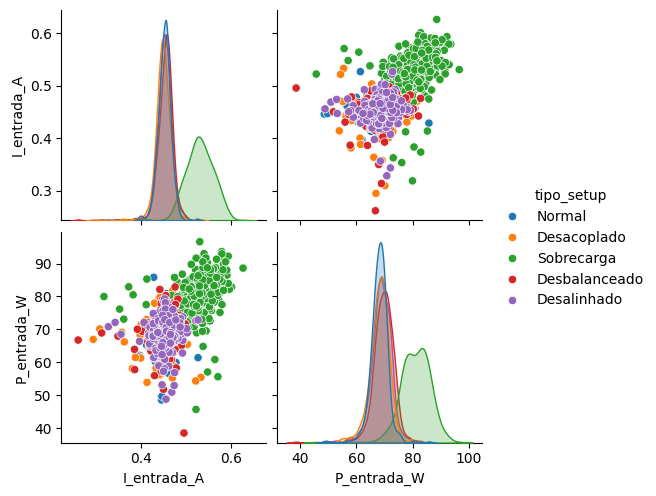

In [15]:
motores2 = motores[['tipo_setup', 'I_entrada_A', 'P_entrada_W']]

sns.pairplot(motores2, hue='tipo_setup')
plt.show()

Após observar os resultados, é possível notar que, a partir do rótulo de sobrecarga, a classe de corrente de entrada é melhor para trabalhar, assim há uma redundância do sensor de pontência.

# Passo 4 - Pré-processamento dos dados
Nesse ponto é possível iniciar uma limpeza dos dados, criar novas características, normalizar/padronizar os dados e por fim selecionar as características mais impactantes para o modelo de processamento.

In [16]:
# Mostrando o novo dataframe com a retirada do sensor de potência

motores_f1 = motores.drop(columns = ['P_entrada_W', 'DesvPad _P_entrada_W', 'Amp_P_entrada_W', 'Kurtosis_P_entrada_W'])
motores_f1

tempo_s   tipo_setup  I_entrada_A  I_saida_A  DesvPad_I_entrada_A  \
0        0.00       Normal      0.44905    1.43660             0.042740   
1        0.08       Normal      0.44610    1.67860             0.048945   
2        0.16       Normal      0.45175    1.39950             0.042337   
3        0.24       Normal      0.43510    1.39705             0.063224   
4        0.32       Normal      0.45055    1.43375             0.048497   
...       ...          ...          ...        ...                  ...   
2500    39.68  Desalinhado      0.46575    1.59235             0.042147   
2501    39.76  Desalinhado      0.44705    1.57365             0.068987   
2502    39.84  Desalinhado      0.47110    1.77275             0.045194   
2503    39.92  Desalinhado      0.47745    1.39700             0.043033   
2504    40.00  Desalinhado      0.48705    1.51215             0.114987   

      DesvPad _I_saida_A  Amp_I_entrada_A  Amp_I_saida_A  \
0               0.113479            0.175          0.406   
1               0.854342            0.227          3.843   
2               0.284000            0.207          1.395   
3               0.219507            0.228          0.973   
4               0.111967            0.222          0.425   
...                  ...              ...            ...   
2500            0.900427            0.199          4.276   
2501            0.904702            0.231          4.218   
2502            1.657858            0.191          7.810   
2503            0.131019            0.194          0.383   
2504            0.514260            0.608          2.476   

      Kurtosis_I_entrada_A  Kurtosis_I_saida_A  Mag_S1_f1_dBrms  \
0                12.474475            4.223108       -50.647991   
1                20.070610           16.966677       -50.696943   
2                19.087723           11.032327       -47.724322   
3                 6.869051            9.136137       -47.652608   
4                20.205840            2.818658       -47.019446   
...                    ...                 ...              ...   
2500              5.486469           21.582764       -33.195195   
2501              5.237910           21.593782       -33.360763   
2502              9.874863            6.075266       -33.497896   
2503             21.320253            1.904577       -33.581380   
2504             10.119385           20.098625       -33.599577   

      Mag_S1_f2_dBrms  Mag_S1_f3_dBrms  Mag_S2_f1_dBrms  Mag_S2_f2_dBrms  \
0          -63.189443       -47.864704       -59.629807       -73.010381   
1          -63.340003       -48.313132       -59.591150       -72.360239   
2          -62.837371       -48.384219       -55.194912       -63.127903   
3          -62.613368       -48.768793       -55.275822       -63.310116   
4          -61.314274       -49.016646       -54.665312       -60.825200   
...               ...              ...              ...              ...   
2500       -52.502279       -41.610532       -37.874381       -49.147213   
2501       -52.868492       -42.054637       -37.995903       -49.251871   
2502       -53.300911       -42.289221       -38.129107       -48.947030   
2503       -53.601503       -42.527074       -38.258422       -48.618126   
2504       -53.697702       -42.686179       -38.335583       -48.344164   

      Mag_S2_f3_dBrms  
0          -49.583755  
1          -49.473893  
2          -48.083630  
3          -47.937933  
4          -47.886619  
...               ...  
2500       -42.417970  
2501       -42.703237  
2502       -42.896321  
2503       -42.420583  
2504       -41.969820  

[2505 rows x 16 columns]

Com isso, já houve um filtro de features inicial, mas ainda seria interessante conseguir filtrar mais para o processamento ser mais leve.

Agora será aplicado mais uma seleção de atributos com o uso de sklearn.feature_selection. Esse selecionará uma quantidade definida de melhores atributos com base em mutual_info_classif. Esse processo pode ser iterado posteriormente aumentando ou diminuindo essa quantidade.

In [17]:
# Iniciando o filtro de features, é necessário retirar o rótulo para focar e fazer uma análise das classes

motores_f1_features = motores_f1.drop(columns = ['tipo_setup'])

from sklearn.feature_selection import SelectKBest, mutual_info_classif
# Selecionar os 7 melhores atributos com base em mutual_info_classif
selector = SelectKBest(score_func=mutual_info_classif, k=7)
motores_f2 = selector.fit_transform(motores_f1_features, motores_f1["tipo_setup"])

motores_f2

array([[  0.44905 , -50.647991, -63.189443, ..., -59.629807, -73.010381,
        -49.583755],
       [  0.4461  , -50.696943, -63.340003, ..., -59.59115 , -72.360239,
        -49.473893],
       [  0.45175 , -47.724322, -62.837371, ..., -55.194912, -63.127903,
        -48.08363 ],
       ...,
       [  0.4711  , -33.497896, -53.300911, ..., -38.129107, -48.94703 ,
        -42.896321],
       [  0.47745 , -33.58138 , -53.601503, ..., -38.258422, -48.618126,
        -42.420583],
       [  0.48705 , -33.599577, -53.697702, ..., -38.335583, -48.344164,
        -41.96982 ]])

In [18]:
# Com isso, é possível realizar a pontuação das features no seletor

scores = selector.scores_
features = list(motores_f1_features)
feature_scores = pd.DataFrame({'Atributo': features, 'Pontuação': scores}).sort_values(by='Pontuação', ascending=False)

feature_scores

Atributo  Pontuação
13       Mag_S2_f2_dBrms   1.238016
10       Mag_S1_f2_dBrms   1.219430
11       Mag_S1_f3_dBrms   1.140709
14       Mag_S2_f3_dBrms   1.075853
9        Mag_S1_f1_dBrms   0.866717
12       Mag_S2_f1_dBrms   0.751251
1            I_entrada_A   0.445747
3    DesvPad_I_entrada_A   0.037391
2              I_saida_A   0.035918
6          Amp_I_saida_A   0.017884
4     DesvPad _I_saida_A   0.009432
7   Kurtosis_I_entrada_A   0.001926
0                tempo_s   0.000000
5        Amp_I_entrada_A   0.000000
8     Kurtosis_I_saida_A   0.000000

In [19]:
# Seleciona-se os features com as maiores pontuações, sendo elas as 7 primeiras

motores_vibracao = motores[['tipo_setup', 'Mag_S2_f2_dBrms', 'Mag_S1_f2_dBrms', 'Mag_S1_f3_dBrms', 'Mag_S2_f3_dBrms', 'Mag_S1_f1_dBrms', 'Mag_S2_f1_dBrms', 'I_entrada_A']]

motores_vibracao

tipo_setup  Mag_S2_f2_dBrms  Mag_S1_f2_dBrms  Mag_S1_f3_dBrms  \
0          Normal       -73.010381       -63.189443       -47.864704   
1          Normal       -72.360239       -63.340003       -48.313132   
2          Normal       -63.127903       -62.837371       -48.384219   
3          Normal       -63.310116       -62.613368       -48.768793   
4          Normal       -60.825200       -61.314274       -49.016646   
...           ...              ...              ...              ...   
2500  Desalinhado       -49.147213       -52.502279       -41.610532   
2501  Desalinhado       -49.251871       -52.868492       -42.054637   
2502  Desalinhado       -48.947030       -53.300911       -42.289221   
2503  Desalinhado       -48.618126       -53.601503       -42.527074   
2504  Desalinhado       -48.344164       -53.697702       -42.686179   

      Mag_S2_f3_dBrms  Mag_S1_f1_dBrms  Mag_S2_f1_dBrms  I_entrada_A  
0          -49.583755       -50.647991       -59.629807      0.44905  
1          -49.473893       -50.696943       -59.591150      0.44610  
2          -48.083630       -47.724322       -55.194912      0.45175  
3          -47.937933       -47.652608       -55.275822      0.43510  
4          -47.886619       -47.019446       -54.665312      0.45055  
...               ...              ...              ...          ...  
2500       -42.417970       -33.195195       -37.874381      0.46575  
2501       -42.703237       -33.360763       -37.995903      0.44705  
2502       -42.896321       -33.497896       -38.129107      0.47110  
2503       -42.420583       -33.581380       -38.258422      0.47745  
2504       -41.969820       -33.599577       -38.335583      0.48705  

[2505 rows x 8 columns]

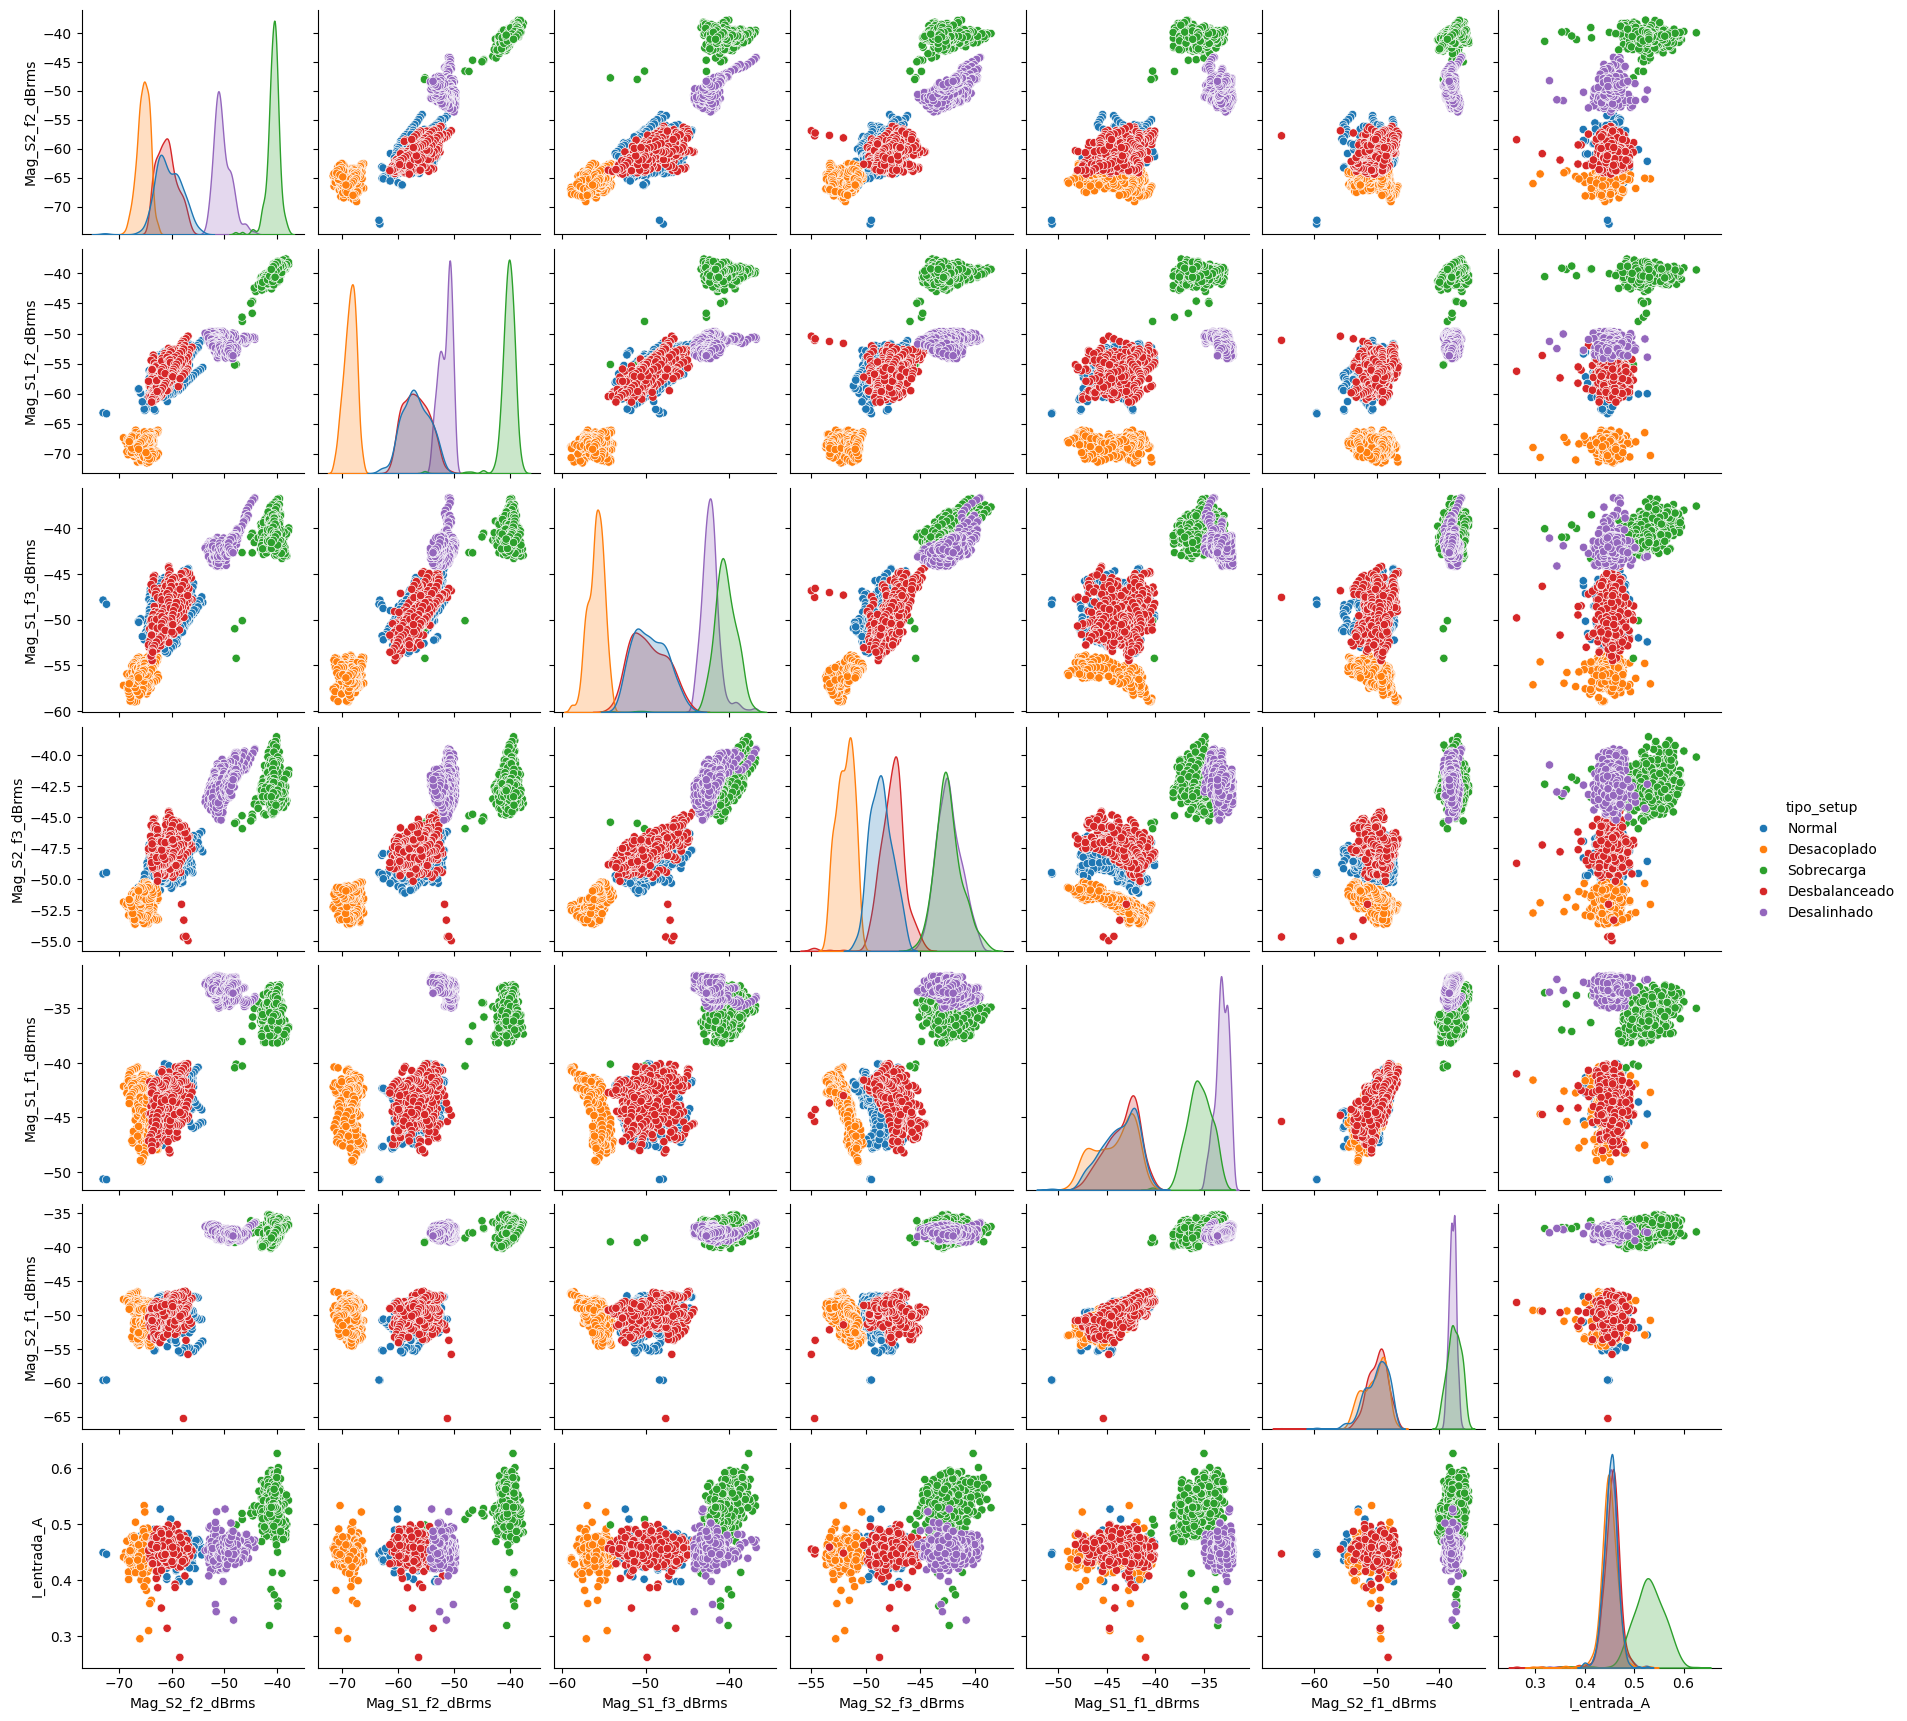

In [20]:
# Realiza-se um pairplot com as features filtradas

sns.pairplot(motores_vibracao, hue='tipo_setup')
plt.show()

É possível observar que alguns rótulos se diferenciam facilmente, contudo não há uma distinção clara entre os rótulos "Normal" e "Desbalanceado" (pontos azuis e vermelhors, respectivamentes).

Com isso, uma alternativa é a criação de uma nova feature derivada das demais, para tentar criar uma separação entre os rótulos que garanta uma distinção mais clara.

In [21]:
#Criando uma feature definida pela razão entre da medição do sensor 2 de vibração no segundo harmônico e a corrente média de entrada

motores_vibracao['ratio_mags2f2_ientrada'] = motores_vibracao['Mag_S2_f2_dBrms']/motores_vibracao['I_entrada_A']

#Verifica-se o dataframe com a nova feature
motores_vibracao

C:\Users\pedro\AppData\Local\Temp\ipykernel_5708\1136346550.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  motores_vibracao['ratio_mags2f2_ientrada'] = motores_vibracao['Mag_S2_f2_dBrms']/motores_vibracao['I_entrada_A']


tipo_setup  Mag_S2_f2_dBrms  Mag_S1_f2_dBrms  Mag_S1_f3_dBrms  \
0          Normal       -73.010381       -63.189443       -47.864704   
1          Normal       -72.360239       -63.340003       -48.313132   
2          Normal       -63.127903       -62.837371       -48.384219   
3          Normal       -63.310116       -62.613368       -48.768793   
4          Normal       -60.825200       -61.314274       -49.016646   
...           ...              ...              ...              ...   
2500  Desalinhado       -49.147213       -52.502279       -41.610532   
2501  Desalinhado       -49.251871       -52.868492       -42.054637   
2502  Desalinhado       -48.947030       -53.300911       -42.289221   
2503  Desalinhado       -48.618126       -53.601503       -42.527074   
2504  Desalinhado       -48.344164       -53.697702       -42.686179   

      Mag_S2_f3_dBrms  Mag_S1_f1_dBrms  Mag_S2_f1_dBrms  I_entrada_A  \
0          -49.583755       -50.647991       -59.629807      0.44905   
1          -49.473893       -50.696943       -59.591150      0.44610   
2          -48.083630       -47.724322       -55.194912      0.45175   
3          -47.937933       -47.652608       -55.275822      0.43510   
4          -47.886619       -47.019446       -54.665312      0.45055   
...               ...              ...              ...          ...   
2500       -42.417970       -33.195195       -37.874381      0.46575   
2501       -42.703237       -33.360763       -37.995903      0.44705   
2502       -42.896321       -33.497896       -38.129107      0.47110   
2503       -42.420583       -33.581380       -38.258422      0.47745   
2504       -41.969820       -33.599577       -38.335583      0.48705   

      ratio_mags2f2_ientrada  
0                -162.588534  
1                -162.206319  
2                -139.740792  
3                -145.507047  
4                -135.002109  
...                      ...  
2500             -105.522733  
2501             -110.170833  
2502             -103.899448  
2503             -101.828728  
2504              -99.259140  

[2505 rows x 9 columns]

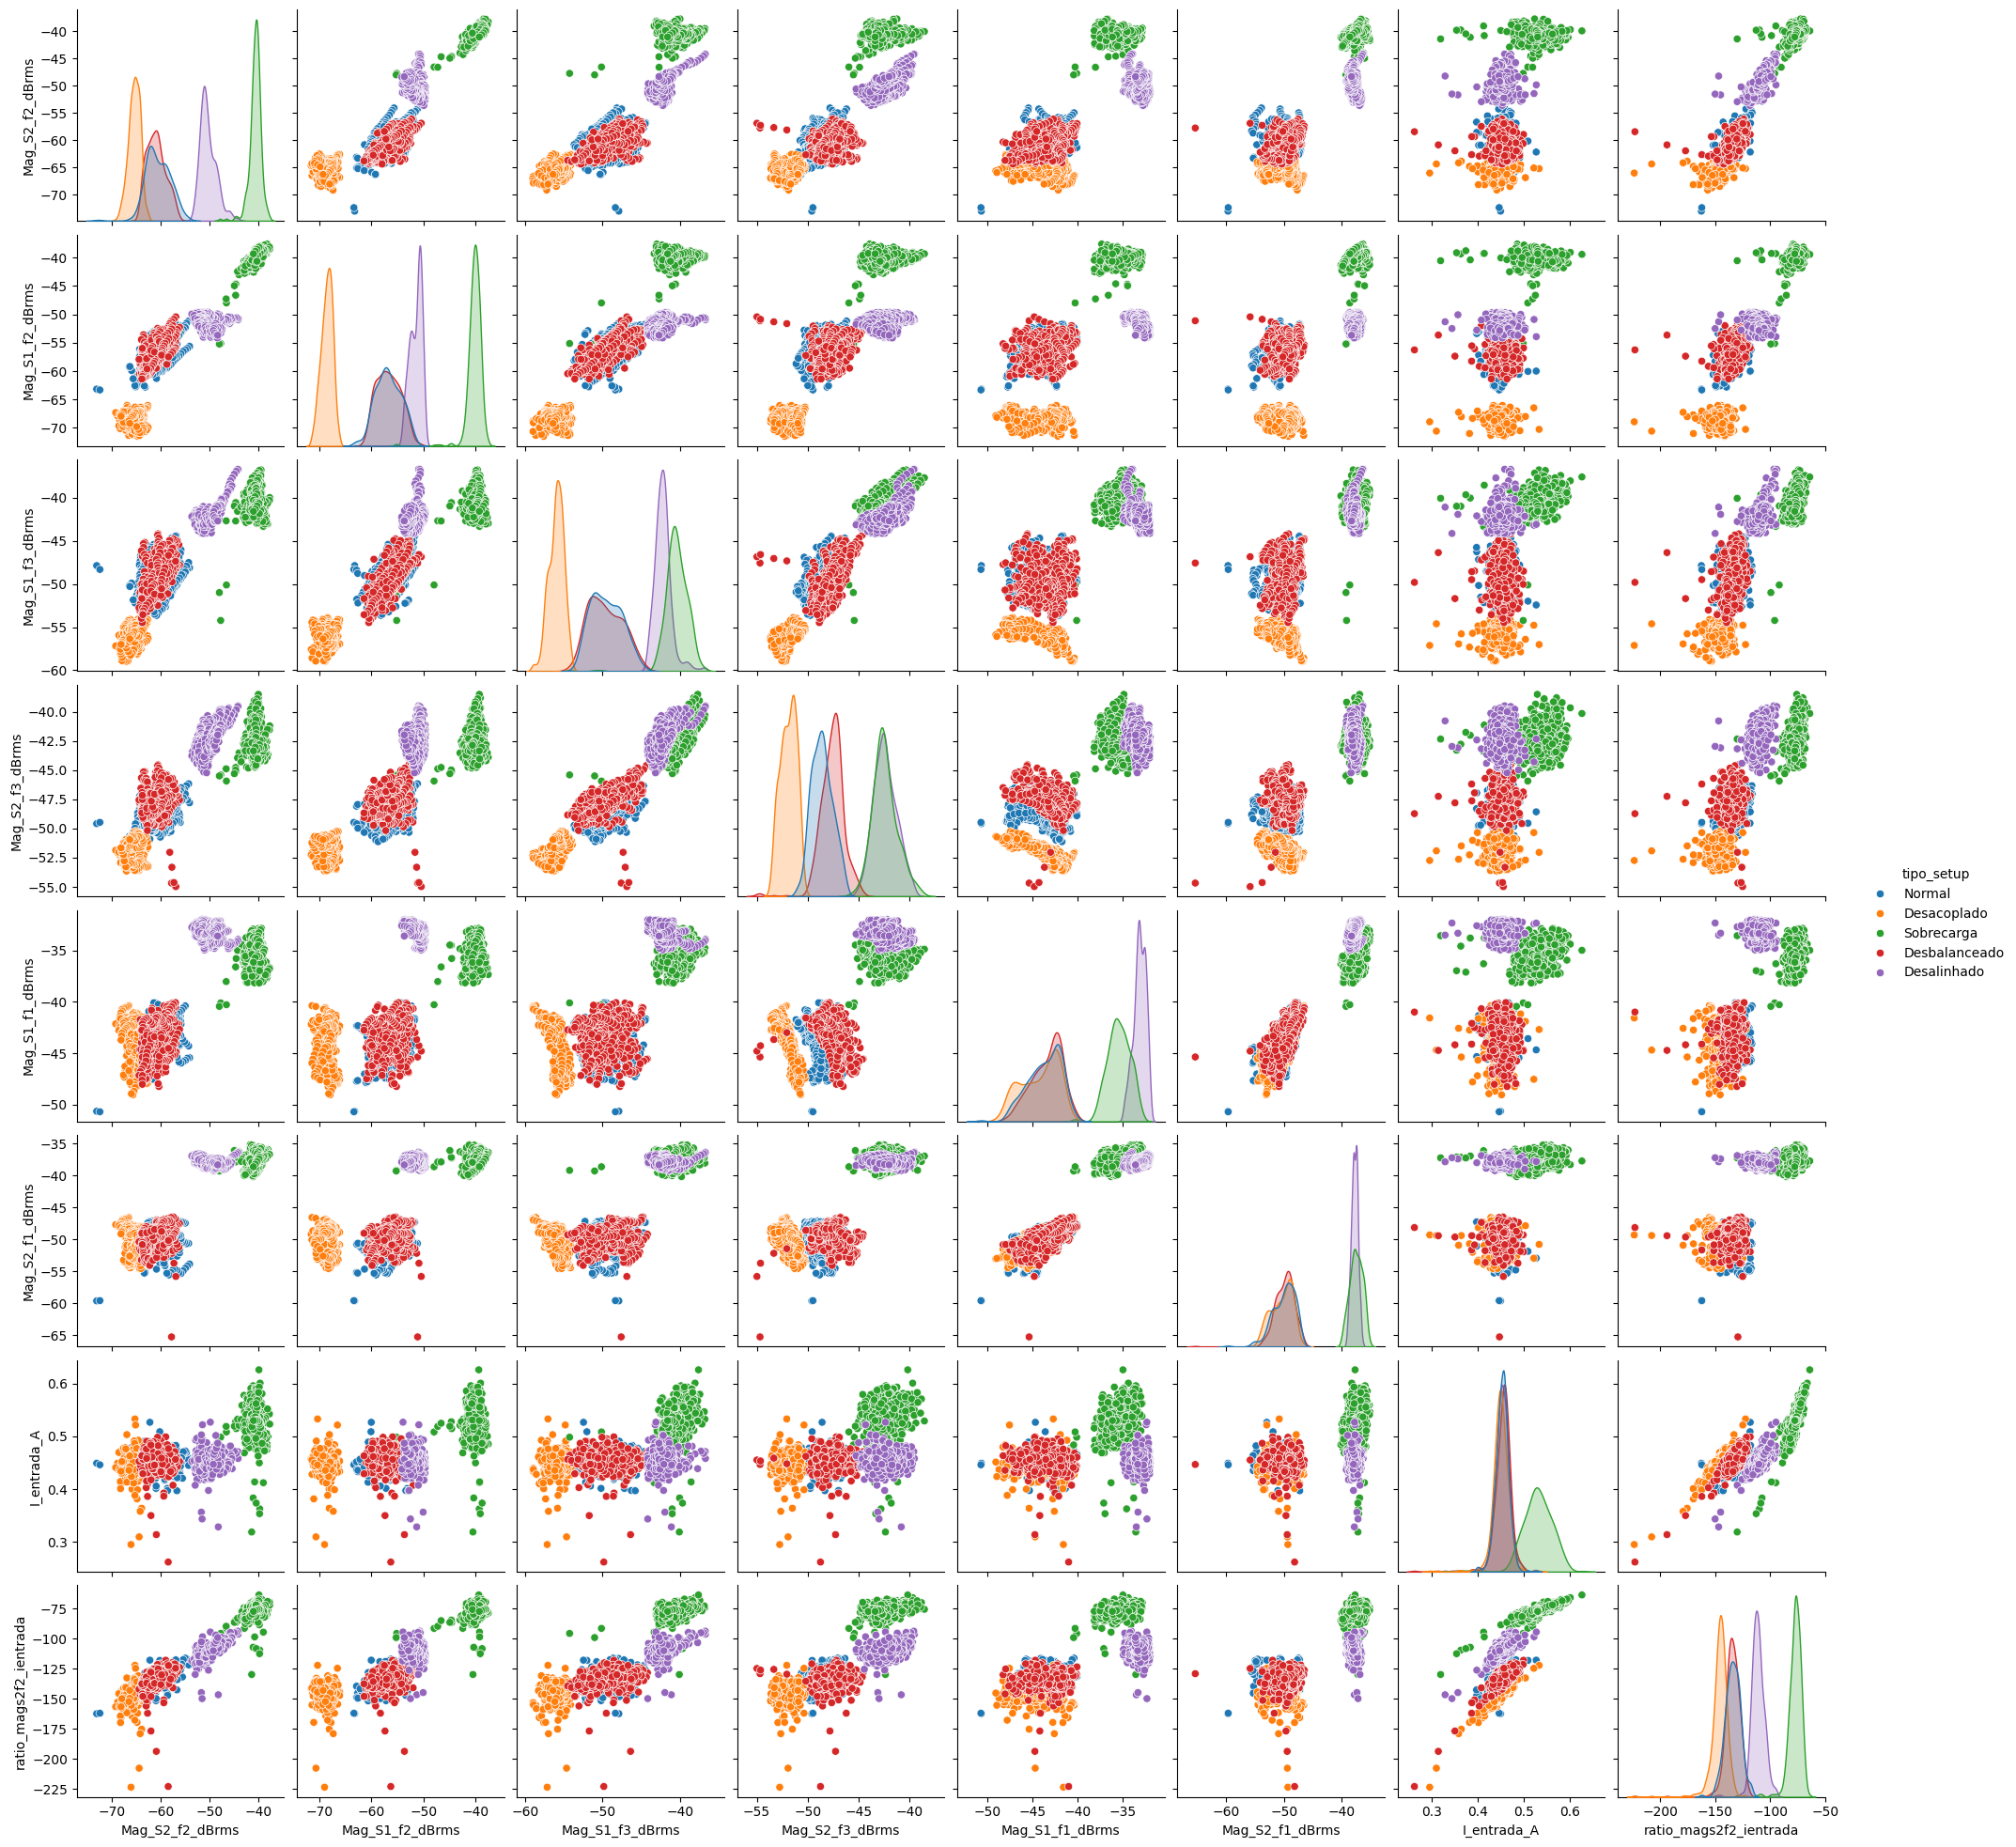

In [22]:
# Checando o novo pairplot para possível melhora na separação de rótulos
sns.pairplot(motores_vibracao, hue='tipo_setup')
plt.show()

É possível perceber que não houve alguma modificação significativa. A nova feature não foi capaz de diferenciar suficientemente, em um primeiro momento, os rótulos sobrepostos. Como a criação e análise de novas features pode ser um processo longo, alternativas devem ser consideradas para lidar com a sobreposição.

# Passo 5 - Desenvolver o Modelo
Nessa parte, será realizada alguns desenvolvimentos de algorítmos, treinando-os, ajustando-os e avaliando-os para no final, ter uma escolha que analise as falhas dos motores.

Em um primeiro momento, considera-se como alternativa para lidar com a sobreposição, o uso de um modelo SVM(Support Vector Machine), com kernel não-linear, pois este é indicado para situações como essa. O modelo de SVM não-linear, cria novas dimensões de análise das features, de forma que possa tentar realizar alguma distinção, quando não ha a possibilidade de se distinguir os rótulos através de uma separação linear.

O kernel escolhido é o Radial Basis Function (RBF), o kernel padrão para o classificador baseado em SVM da biblioteca SKLearn. Este kernel tambem é conhecido como Gaussiano. Ele analisa a distância euclideana entre pontos em diversos conjuntos de dimensões e considera pontos próximos (pequenas distâncias) como sendo mais semelhantes do que pontos afastados (Grandes distâncias), de forma semelhante ao modelo KNN. Ao fim da análise a classificação do ponto é dado por um voto de maioria. Isso permite que se crie fronteiras de classificação complexas, mas que consigam distinguir dados aparentemente sobrepostos.(https://scikit-learn.org/stable/auto_examples/svm/plot_svm_kernels.html#sphx-glr-auto-examples-svm-plot-svm-kernels-py)

In [23]:
#SVM com o dataset filtrado
#O SVM com kernel não-linear é indicado para esses casos em que não da pra diferenciar claramente
#Ele adiciona mais dimensões para tentar separar as classes sobrepostas
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

#Preparando a separação dos dados
motores_vibracao_setup = motores_vibracao['tipo_setup']
motores_vibracao_features = motores_vibracao.drop(columns = ['tipo_setup', 'ratio_mags2f2_ientrada'])

#30 % dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(motores_vibracao_features, motores_vibracao_setup, test_size=0.3, random_state=42)

#Definindo o modelo SVM
#O parametro gamma controla a influência individual de cada instância de treinamento na fronteira de decisão
#Valor 'auto' define gamma como 1/nº de features
svm_model = SVC(kernel='rbf', gamma='auto')
svm_model.fit(X_train, y_train)

# Acurácia do modelo 
#Avaliação inicial geral da acurácia do modelo
print("Acurácia SVM:", svm_model.score(X_test, y_test))

Acurácia SVM: 0.9800531914893617


In [24]:
#report de classificador para verificar as métricas
#Parece que tem um bom desempenho mas tem que avaliar melhor a performance e verificar overfitting
#Parece que o problema de sobreposição de "normal" e "balanceado" foi contornado
from sklearn.metrics import classification_report, confusion_matrix
y_pred = svm_model.predict(X_test)
class_report = classification_report(y_test, y_pred)

print(class_report)

               precision    recall  f1-score   support

  Desacoplado       1.00      1.00      1.00       144
  Desalinhado       1.00      1.00      1.00       143
Desbalanceado       0.96      0.95      0.96       158
       Normal       0.94      0.96      0.95       155
   Sobrecarga       1.00      0.99      1.00       152

     accuracy                           0.98       752
    macro avg       0.98      0.98      0.98       752
 weighted avg       0.98      0.98      0.98       752



In [25]:
#Matriz de confusão ajuda a visualizar as classificações entre as diferentes classes
#Quanto maiores os números na diagonal principal maior taxa de acertos de classificação
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[144   0   0   0   0]
 [  0 143   0   0   0]
 [  0   0 150   8   0]
 [  0   0   6 149   0]
 [  0   0   0   1 151]]


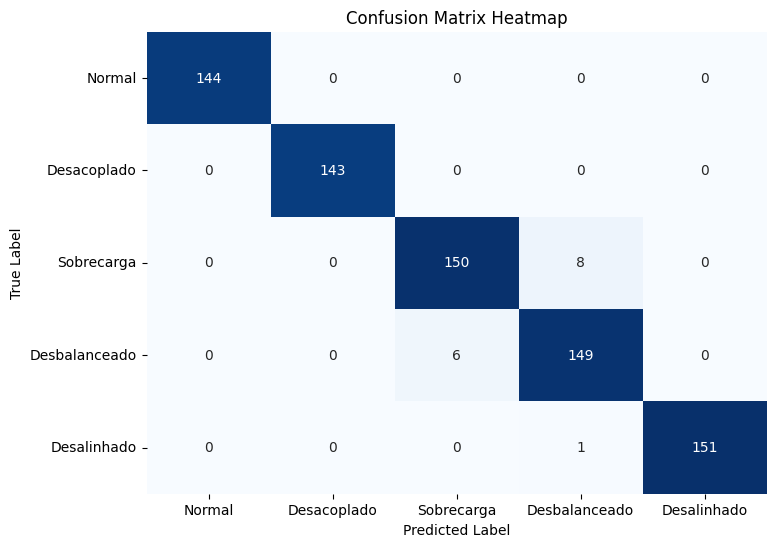

In [26]:
#Heatmap da matriz de confusão pra melhor visualização

labels = ['Normal', 'Desacoplado', 'Sobrecarga', 'Desbalanceado', 'Desalinhado']

plt.figure(figsize=(8,6))  
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)


plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

Pode-se observar que o modelo teve grandes índices de acerto, pela intensidade de cor da diagonal principal da matriz de confusão. Pode-se observar ainda, tanto pela matriz quanto pelo report das métricas do modelo que o recall para o rótulo "Normal" foi alto, no valor de 96%. Ainda, os resultados de acurácia tambem foram altos para os demais rótulos, oque indica que o modelo é bem ajustado às métricas escolhidas.

Ainda deve-se verificar se não há overfitting do modelo, isso é, se ele tem a capacidade de ser generalizado, sem estar super ajustado aos dados de teste. Para isso utiliza-se a curva de aprendizado, que permite comparar a pontuação de treinamento e a de validação cruzada para diferentes tamanhos de conjunto de treinamento. A pontuação de treinamento indica a acurácia do modelo para os dados de treinamento e a pontuação de validação cruzada indica a acurácia para os dados de teste, considerando diferentes divisões entre teste e treino dos dados originais. Caso haja overfitting, o desempenho do modelo para dados de treino será alto enquanto o desempenho para dados de teste será baixo, indicando a falta de capacidade de generalização.

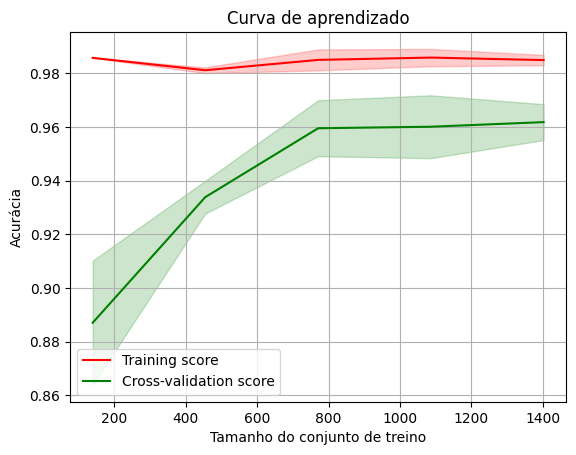

Training Accuracy: 0.9857387335995437
----------------------------
Test Accuracy: 0.9800531914893617


In [53]:
#Curva de aprendizado pra verificar overfitting
#Se tiver desempenho mt alto para treinamento e relativamente mais baixo para a validação significa que não consegue generalizar e "decorou"
#os dados de treinamento

from sklearn.model_selection import learning_curve


train_sizes, train_scores, test_scores = learning_curve(svm_model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, label='Training score', color='r')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='g')

# Plot bands for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.2)

plt.xlabel('Tamanho do conjunto de treino')
plt.ylabel('Acurácia')
plt.title('Curva de aprendizado')
plt.legend()
plt.grid(True)
plt.show()

train_accuracy = svm_model.score(X_train, y_train)
test_accuracy = svm_model.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print('----------------------------')
print("Test Accuracy:", test_accuracy)

Observa-se que o modelo apresentou acurácia de quase 100% para os dados de treino, se mantendo estável independente do tamanho do conjunto de treinamento, já a pontuação de validação cruzada aumentou até se estabilizar por volta de 96% de acurácia com os maiores conjuntos de treino. Estes resultados indicam que não há overfitting e o modelo está bem ajustado

Ainda que o uso do modelo SVM pareça promisso, é necessário avaliar o desempenho de outros tipos de modelo no processo de escolha, pois apesar de conseguir apresentar um bom desempenho, o modelo SVM utiliza muitos recursos de processamento. Caso um desempenho similar possa ser alcançado com modelos mais simples, haverá um ganho em tempo de processamento. Assim avalia-se em seguida o uso do modelo Decision tree para a classificação de tipos de falha.

In [28]:
# Passando agora para o Decision tree, é necessário importar algumas bibliotecas
from sklearn.tree import DecisionTreeClassifier


#30 % dos dados para teste
X_train, X_test, y_train, y_test = train_test_split(motores_vibracao_features, motores_vibracao_setup, test_size=0.3, random_state=42)


# Criar classificador DecisionTree
dtc = DecisionTreeClassifier(random_state=42)

# Treinar modelo
dtc.fit(X_train, y_train)

# Fazer previsões de classes no conjunto de teste
y_pred_dtc = dtc.predict(X_test)

# Gerar um Matriz Confusão
print('Matriz Confusão DT:')
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print(cm_dtc)

Matriz Confusão DT:
[[144   0   0   0   0]
 [  0 143   0   0   0]
 [  0   0 129  29   0]
 [  0   0  25 130   0]
 [  0   0   0   0 152]]


In [29]:
# É necessário realizar um relatório de avaliação
class_report = classification_report(y_test, y_pred_dtc)

print(class_report)

               precision    recall  f1-score   support

  Desacoplado       1.00      1.00      1.00       144
  Desalinhado       1.00      1.00      1.00       143
Desbalanceado       0.84      0.82      0.83       158
       Normal       0.82      0.84      0.83       155
   Sobrecarga       1.00      1.00      1.00       152

     accuracy                           0.93       752
    macro avg       0.93      0.93      0.93       752
 weighted avg       0.93      0.93      0.93       752



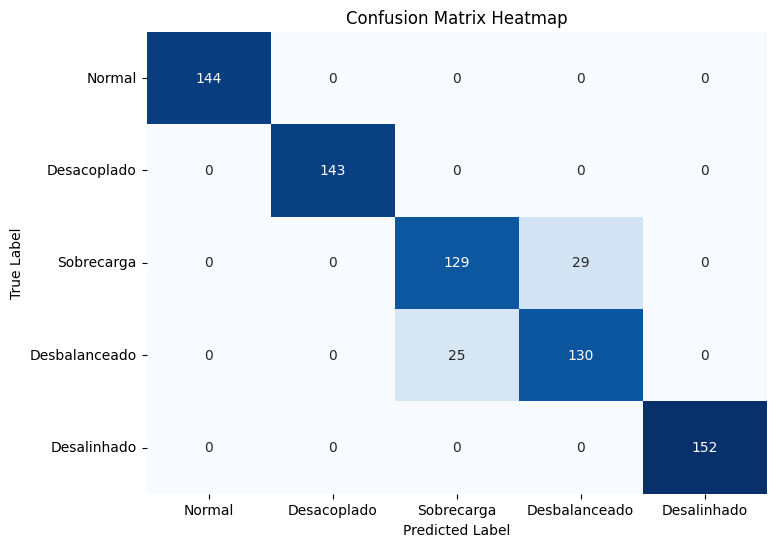

In [30]:
# Realizase um heatmap da matriz de confusão pra melhor visualização

labels = ['Normal', 'Desacoplado', 'Sobrecarga', 'Desbalanceado', 'Desalinhado']

plt.figure(figsize=(8,6))  
sns.heatmap(cm_dtc, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=labels, yticklabels=labels)


plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix Heatmap')
plt.show()

In [31]:
# Calcular os valores de custo de complexidade efetivo (ccp_alpha) para poda
path = dtc.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas
ccp_alphas

array([0.        , 0.00054043, 0.00054329, 0.00054452, 0.00054668,
       0.00054668, 0.00055078, 0.00055078, 0.00055749, 0.00055857,
       0.00057249, 0.0007606 , 0.0007606 , 0.00085568, 0.00091272,
       0.00091272, 0.00093346, 0.00098779, 0.00099496, 0.00100589,
       0.00102812, 0.00104583, 0.00106959, 0.00111088, 0.00118021,
       0.00132866, 0.00134364, 0.00150853, 0.00156328, 0.00162986,
       0.00177474, 0.00186693, 0.0019314 , 0.00224476, 0.00226913,
       0.0023181 , 0.00250665, 0.00298197, 0.00327664, 0.00360133,
       0.00367149, 0.00368592, 0.00720689, 0.00734163, 0.00844701,
       0.00969467, 0.01012572, 0.01028015, 0.03554004, 0.19921235,
       0.20273199])

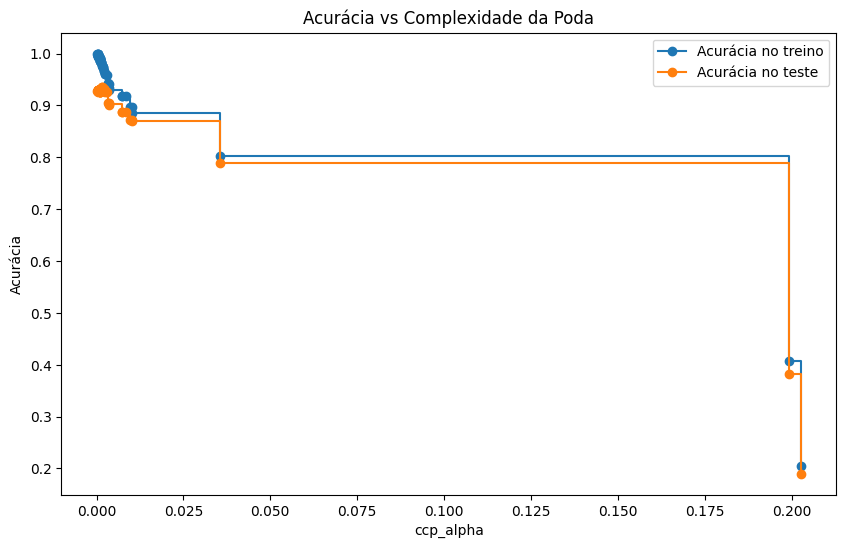

In [32]:
# Aplicar poda com diferentes valores de ccp_alpha
# Treinar um modelo para cada valor de ccp_alpha
clfs = []
for ccp_alpha in ccp_alphas:
    clf_pruned = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf_pruned.fit(X_train, y_train)
    clfs.append(clf_pruned)
    
# Avaliar a acurácia de cada modelo com poda
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

# Plotar a acurácia em função do ccp_alpha
# quanto maior o valor de ccp_alpha, mais nós serão podados.
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, label='Acurácia no treino', marker='o', drawstyle="steps-post")
plt.plot(ccp_alphas, test_scores, label='Acurácia no teste', marker='o', drawstyle="steps-post")
plt.xlabel('ccp_alpha')
plt.ylabel('Acurácia')
plt.title('Acurácia vs Complexidade da Poda')
plt.legend()
plt.show()

In [33]:
# Selecionar o melhor modelo com base no trade-off entre overfitting e generalização
best_clf = clfs[np.argmax(test_scores)]
best_clf

DecisionTreeClassifier(ccp_alpha=0.0015632843403871966, random_state=42)

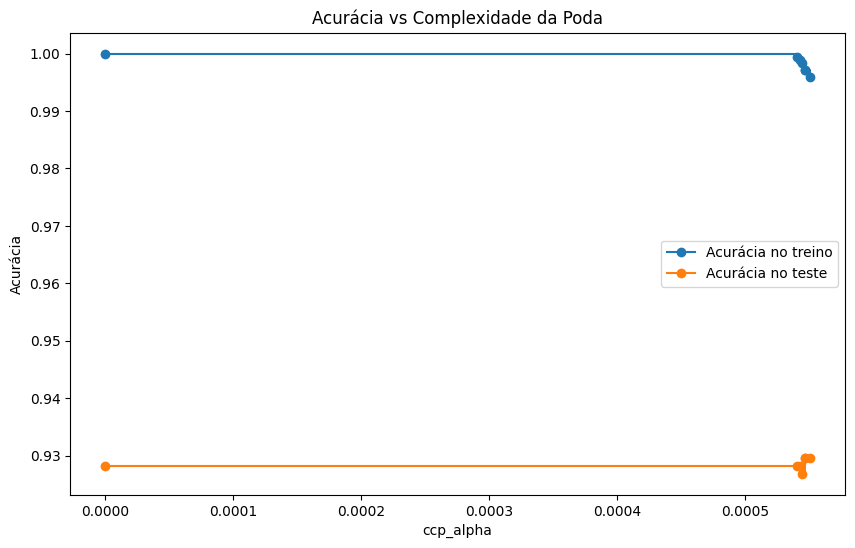

In [34]:
# Plotar a acurácia em função do ccp_alpha na faixa do melhor valor da poda
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas[:7], train_scores[:7], label='Acurácia no treino', marker='o', drawstyle="steps-post")
plt.plot(ccp_alphas[:7], test_scores[:7], label='Acurácia no teste', marker='o', drawstyle="steps-post")
plt.xlabel('ccp_alpha')
plt.ylabel('Acurácia')
plt.title('Acurácia vs Complexidade da Poda')
plt.legend()
plt.show()

In [35]:
# Avaliar o modelo podado
accuracy_with_pruning = best_clf.score(X_test, y_test)
print(f'Acurácia com poda: {accuracy_with_pruning:.2f}')

Acurácia com poda: 0.94


In [36]:
# Fazer previsões de classes no conjunto de teste
y_pred_dtc = best_clf.predict(X_test)

# Gerar um Matriz Confusão
print('Matriz Confusão DT com poda:')
cm_dtc = confusion_matrix(y_test, y_pred_dtc)
print(cm_dtc)

Matriz Confusão DT com poda:
[[144   0   0   0   0]
 [  0 143   0   0   0]
 [  0   0 134  24   0]
 [  0   0  24 131   0]
 [  0   0   0   0 152]]


In [37]:
# Gerar um relatório de avaliação
print('Relatório DT com poda:')
print(classification_report(y_test, y_pred_dtc))

Relatório DT com poda:
               precision    recall  f1-score   support

  Desacoplado       1.00      1.00      1.00       144
  Desalinhado       1.00      1.00      1.00       143
Desbalanceado       0.85      0.85      0.85       158
       Normal       0.85      0.85      0.85       155
   Sobrecarga       1.00      1.00      1.00       152

     accuracy                           0.94       752
    macro avg       0.94      0.94      0.94       752
 weighted avg       0.94      0.94      0.94       752



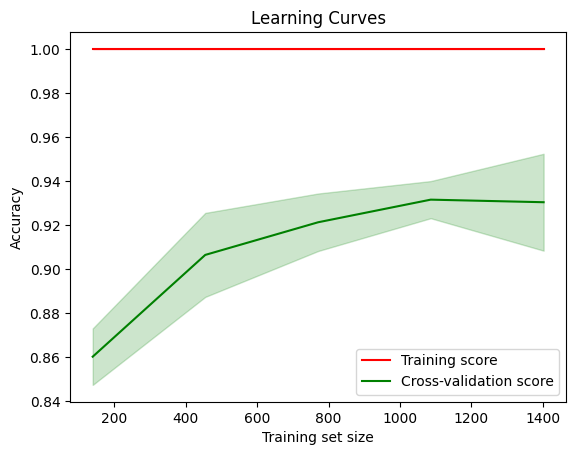

Training Accuracy: 1.0
----------------------------
Test Accuracy: 0.9281914893617021


In [52]:

train_sizes, train_scores, test_scores = learning_curve(dtc, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, label='Training score', color='r')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='g')

# Plot bands for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.2)

plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()

train_accuracy = dtc.score(X_train, y_train)
test_accuracy = dtc.score(X_test, y_test)
print("Training Accuracy:", train_accuracy)
print('----------------------------')
print("Test Accuracy:", test_accuracy)

Apesar de obter uma pequena melhora na acurácia, é possível observar que os melhores resultados do desicion tree ocorrem com o valor de ccp_alpha bem próximo de zero. Isso sugere que a árvore original já está funcionando bem, e que qualquer poda adicional piora a acurácia do modelo.

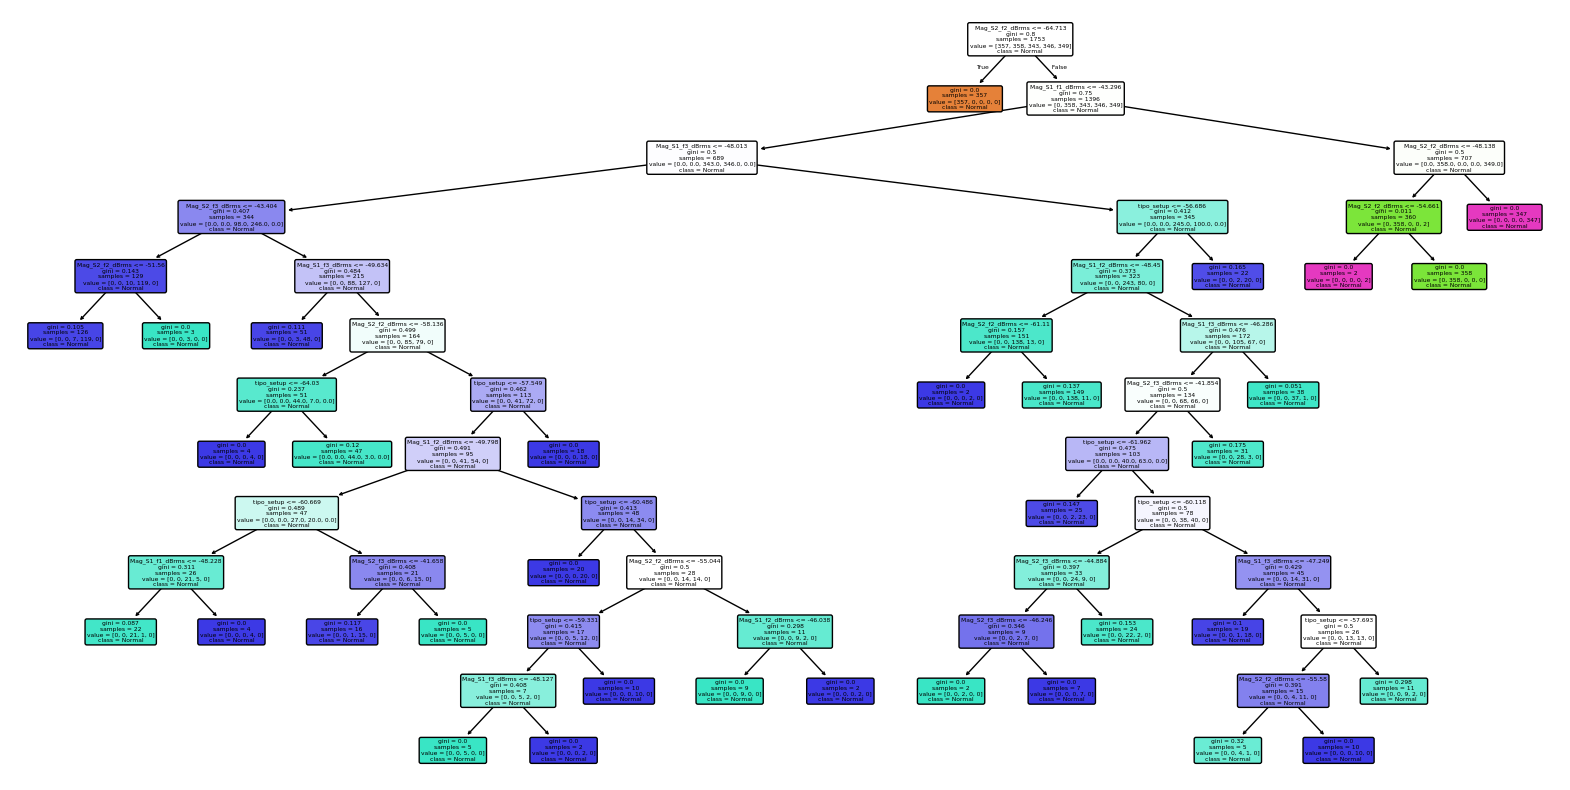

In [39]:
from sklearn import tree
data = motores_vibracao
plt.figure(figsize=(20, 10))
tree.plot_tree(best_clf, feature_names=data.columns, class_names=data.tipo_setup, filled=True, rounded=True)
plt.show()


Observou-se que mesmo sendo um modelo que poderia economizar recursos de processamento, o Decision tree, mesmo após tentativas de refino, não atingiu um desempenho tão bom quanto o SVM, atingindo um valor máximo de recall para o rótulo "Normal" de 85% e uma acurácia geral de 94%, que apesar de serem bons resultados continuam inferiores ao SVM.

Por fim testa-se o modelo KNN que, de forma semelhante, ao SVM não-linear, analisa os arredores dos pontos de dados para tentar determinar a melhor classificação de falha, pois parte-se do pressuposto que pontos localizados próximos, quando analisa-se as features como dimensões, devem ter características semelhantes e, portanto, devem ter a mesma classificação. Em um momento inicial, espera-se que este modelo tenha bom desempenho para classificar as falhas de desalinhamento, desacoplamento e sobrecaraga, pois estas 3 aparentaram ser facilmente distinguíveis com a maioria das features no pairplot gerado anteriormente. Os rótulos de "Normal" e "Desbalanceado" devem sofrer da sua sobreposição, prejudicando a performance deste modelo.

In [40]:
# Modelagem com K-NN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

y = motores_vibracao['tipo_setup']
motores_filtrados = motores_vibracao.drop(columns = ['tipo_setup', 'ratio_mags2f2_ientrada'])

# Separar os dados em conjuntos de treino e teste 
X_train, X_test, y_train, y_test = train_test_split(motores_filtrados, y, test_size=0.3, random_state=42)

# Instanciar o modelo K-NN e treiná-lo
knn = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn.fit(X_train, y_train)

print("Precisão ->", knn.score(X_test, y_test))

Precisão -> 0.9680851063829787


In [42]:
# Avaliação de Desempenho

# Fazer previsões no conjunto de teste
y_pred = knn.predict(X_test)

# Avaliar o desempenho do modelo
print("\nAvaliação de Desempenho do Modelo K-NN:")
print(classification_report(y_test, y_pred))
print(f"Acurácia: {accuracy_score(y_test, y_pred):.2f}")
print(f"Matriz de Confusão:\n {confusion_matrix(y_test, y_pred)}")



Avaliação de Desempenho do Modelo K-NN:
               precision    recall  f1-score   support

  Desacoplado       1.00      1.00      1.00       144
  Desalinhado       1.00      1.00      1.00       143
Desbalanceado       0.92      0.92      0.92       158
       Normal       0.92      0.92      0.92       155
   Sobrecarga       1.00      1.00      1.00       152

     accuracy                           0.97       752
    macro avg       0.97      0.97      0.97       752
 weighted avg       0.97      0.97      0.97       752

Acurácia: 0.97
Matriz de Confusão:
 [[144   0   0   0   0]
 [  0 143   0   0   0]
 [  0   0 146  12   0]
 [  0   0  12 143   0]
 [  0   0   0   0 152]]


Agora vamos tentar esse mesmo modelo mas sem o atributo da corrente de entrada e observar se o desempenho melhora ou não

In [43]:
motores_filtrados2 = motores[['tipo_setup', 'Mag_S2_f2_dBrms', 'Mag_S1_f2_dBrms', 'Mag_S1_f3_dBrms', 'Mag_S2_f3_dBrms', 'Mag_S1_f1_dBrms', 'Mag_S2_f1_dBrms']]

motores_filtrados2

tipo_setup  Mag_S2_f2_dBrms  Mag_S1_f2_dBrms  Mag_S1_f3_dBrms  \
0          Normal       -73.010381       -63.189443       -47.864704   
1          Normal       -72.360239       -63.340003       -48.313132   
2          Normal       -63.127903       -62.837371       -48.384219   
3          Normal       -63.310116       -62.613368       -48.768793   
4          Normal       -60.825200       -61.314274       -49.016646   
...           ...              ...              ...              ...   
2500  Desalinhado       -49.147213       -52.502279       -41.610532   
2501  Desalinhado       -49.251871       -52.868492       -42.054637   
2502  Desalinhado       -48.947030       -53.300911       -42.289221   
2503  Desalinhado       -48.618126       -53.601503       -42.527074   
2504  Desalinhado       -48.344164       -53.697702       -42.686179   

      Mag_S2_f3_dBrms  Mag_S1_f1_dBrms  Mag_S2_f1_dBrms  
0          -49.583755       -50.647991       -59.629807  
1          -49.473893       -50.696943       -59.591150  
2          -48.083630       -47.724322       -55.194912  
3          -47.937933       -47.652608       -55.275822  
4          -47.886619       -47.019446       -54.665312  
...               ...              ...              ...  
2500       -42.417970       -33.195195       -37.874381  
2501       -42.703237       -33.360763       -37.995903  
2502       -42.896321       -33.497896       -38.129107  
2503       -42.420583       -33.581380       -38.258422  
2504       -41.969820       -33.599577       -38.335583  

[2505 rows x 7 columns]

In [44]:
y2 = motores_filtrados2['tipo_setup']
motores_filtrados2 = motores_filtrados2.drop(columns = ['tipo_setup'])

# Separar os dados em conjuntos de treino e teste 
X_train2, X_test2, y_train2, y_test2 = train_test_split(motores_filtrados2, y2, test_size=0.3, random_state=42)

# Instanciar o modelo K-NN e treiná-lo
knn2 = KNeighborsClassifier(n_neighbors=3, metric='euclidean')
knn2.fit(X_train2, y_train2)

print("Precisão ->", knn2.score(X_test2, y_test2))

Precisão -> 0.9680851063829787


In [45]:
y_pred2 = knn2.predict(X_test2)

# Avaliar o desempenho do modelo
print("\nAvaliação de Desempenho do Modelo K-NN:")
print(classification_report(y_test2, y_pred2))
print(f"Acurácia: {accuracy_score(y_test2, y_pred2):.2f}")
print(f"Matriz de Confusão:\n {confusion_matrix(y_test2, y_pred2)}")


Avaliação de Desempenho do Modelo K-NN:
               precision    recall  f1-score   support

  Desacoplado       1.00      1.00      1.00       144
  Desalinhado       1.00      1.00      1.00       143
Desbalanceado       0.92      0.92      0.92       158
       Normal       0.92      0.92      0.92       155
   Sobrecarga       1.00      1.00      1.00       152

     accuracy                           0.97       752
    macro avg       0.97      0.97      0.97       752
 weighted avg       0.97      0.97      0.97       752

Acurácia: 0.97
Matriz de Confusão:
 [[144   0   0   0   0]
 [  0 143   0   0   0]
 [  0   0 146  12   0]
 [  0   0  12 143   0]
 [  0   0   0   0 152]]


Aparentemente não houve nehuma mudança, assim podemos concluir que o atributo de corrente de entrada é desnecessário. Para garantir essa conclusão vamos analisar o Heatmap dos dois lado a lado.

In [46]:
# vamos primeiro separar a Matriz de Confusão de cada situação

M_C = confusion_matrix(y_test, y_pred)
M_C_2 = confusion_matrix(y_test2, y_pred2)

C:\Users\pedro\AppData\Local\Temp\ipykernel_5708\3930046474.py:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


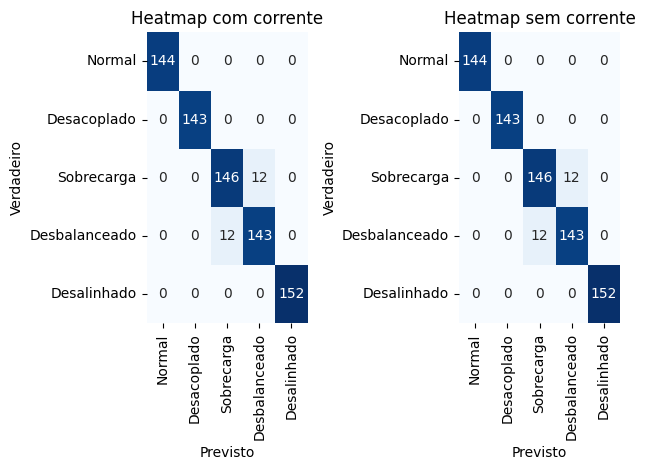

In [47]:
leg = ['Normal', 'Desacoplado', 'Sobrecarga', 'Desbalanceado', 'Desalinhado']

grafico1 = sns.heatmap(M_C, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=leg, yticklabels=leg)
grafico2 = sns.heatmap(M_C, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=leg, yticklabels=leg)

plt.subplot(1, 2, 1)
sns.heatmap(M_C, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=leg, yticklabels=leg)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Heatmap com corrente')

plt.subplot(1, 2, 2)
sns.heatmap(M_C_2, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=leg, yticklabels=leg)
plt.xlabel('Previsto')
plt.ylabel('Verdadeiro')
plt.title('Heatmap sem corrente')

plt.tight_layout()
plt.show()

Agora que determinamos quais são as features mais impactantes para o modelo, vamos agora determinar o melhor valor de K confirindo as curvas ROC

k = 3, Métrica: euclidean
Acurácia: 0.9681
Matriz de Confusão:
[[144   0   0   0   0]
 [  0 143   0   0   0]
 [  0   0 146  12   0]
 [  0   0  12 143   0]
 [  0   0   0   0 152]]
Relatório de Classificação:
               precision    recall  f1-score   support

  Desacoplado       1.00      1.00      1.00       144
  Desalinhado       1.00      1.00      1.00       143
Desbalanceado       0.92      0.92      0.92       158
       Normal       0.92      0.92      0.92       155
   Sobrecarga       1.00      1.00      1.00       152

     accuracy                           0.97       752
    macro avg       0.97      0.97      0.97       752
 weighted avg       0.97      0.97      0.97       752

----------------------------------------
k = 4, Métrica: euclidean
Acurácia: 0.9628
Matriz de Confusão:
[[144   0   0   0   0]
 [  0 143   0   0   0]
 [  0   0 153   5   0]
 [  0   0  23 132   0]
 [  0   0   0   0 152]]
Relatório de Classificação:
               precision    recall  f1-score   

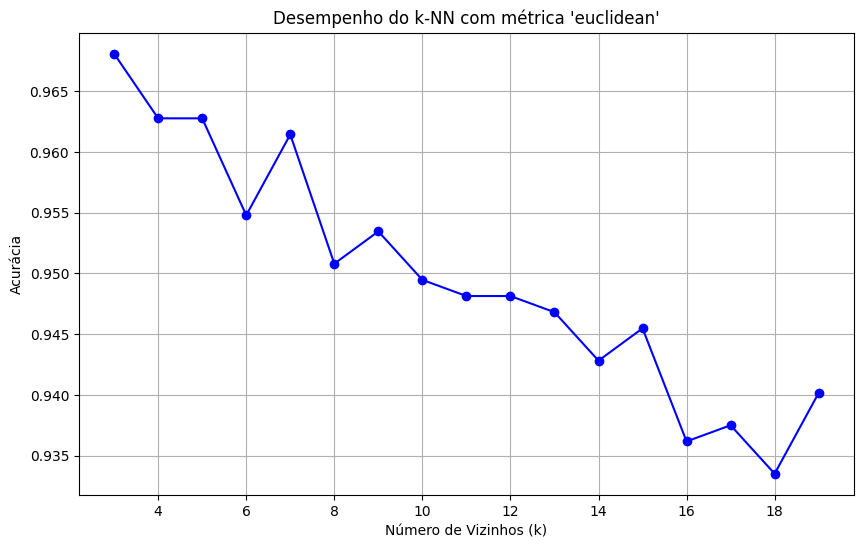

In [51]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Separar os dados em conjuntos de treino e teste 
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(motores_filtrados2, y2, test_size=0.3, random_state=42)

# Função para treinar e testar o modelo k-NN com diferentes 
# valores de k e gerar relatórios de métricas
def knn_comparativo_com_metricas_e_ROC(k_values, metric='euclidean'):
    accuracy_results_f = []
    
    for k in k_values:
        # Criando o modelo k-NN
        knn_f = KNeighborsClassifier(n_neighbors=k, metric=metric)
        
        # Treinando o modelo
        knn_f.fit(X_train_f, y_train_f)
        
        # Fazendo previsões
        y_pred_f = knn_f.predict(X_test_f)

        # Obtendo probabilidades da classe positiva
        y_prob_f = knn_f.predict_proba(X_test_f)[:, 1]

        # Calculando a acurácia
        accuracy_f = accuracy_score(y_test_f, y_pred_f)
        accuracy_results_f.append(accuracy_f)

        # Exibindo os resultados
        print(f"k = {k}, Métrica: {metric}")
        print(f"Acurácia: {accuracy_f:.4f}")
        print("Matriz de Confusão:")
        print(confusion_matrix(y_test_f, y_pred_f))
        print("Relatório de Classificação:")
        print(classification_report(y_test_f, y_pred_f))
        print("-" * 40)

        # -----------------------------------------------------------------------------------  ROC n funcionando ver se vale a pena manter ou n
        # Gerando a curva ROC e calculando a AUC
        #fpr, tpr, _ = roc_curve(y_test_f, y_prob_f)
        #roc_auc = auc(fpr, tpr)

        # Plotando a curva ROC e calculando a AUC
        #plt.plot(fpr, tpr, label=f'k = {k}, AUC = {roc_auc:.3f}')

    # Plotando as curvas ROC de todos os k's
    #plt.plot([0,1], [0,1], 'k--') #linha diagonal
    #plt.title('Curvas ROC para diferentes valores de K')
    #plt.xlabel('Taxa de Falsos Positivos')
    #plt.ylabel('Taxa de Verdadeiros Positivos')
    #plt.legend(loc='lower right')
    #plt.grid(True)
    #plt.show()
    #--------------------------------------------------------------------------------------------

    # Plotando a acurácia para diferentes valores de k
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, accuracy_results_f, marker='o', linestyle='-', color='b')
    plt.title(f"Desempenho do k-NN com métrica '{metric}'")
    plt.xlabel("Número de Vizinhos (k)")
    plt.ylabel("Acurácia")
    plt.grid(True)
    plt.show()

# Testando o k-NN com diferentes valores de k
k_values = list(range(3, 20))
knn_comparativo_com_metricas_e_ROC(k_values)

A partir disso é possível verificar que realmente o melhor valor de k é 3. Agora é possível fazer a curva de aprendizado, assim verificando Overfitting

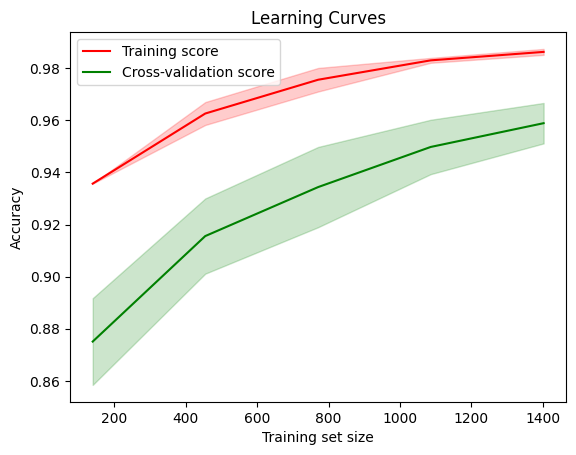

Training Accuracy: 0.9897318881916715
----------------------------
Test Accuracy: 0.9680851063829787


In [49]:
train_sizes, train_scores, test_scores = learning_curve(knn2, X_train2, y_train2, cv=5, scoring='accuracy', n_jobs=-1)

# Calculate mean and standard deviation of scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, label='Training score', color='r')
plt.plot(train_sizes, test_mean, label='Cross-validation score', color='g')

# Plot bands for standard deviation
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='r', alpha=0.2)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='g', alpha=0.2)

plt.xlabel('Training set size')
plt.ylabel('Accuracy')
plt.title('Learning Curves')
plt.legend()
plt.show()

train_accuracy = knn2.score(X_train2, y_train2)
test_accuracy = knn2.score(X_test2, y_test2)
print("Training Accuracy:", train_accuracy)
print('----------------------------')
print("Test Accuracy:", test_accuracy)

Finalmente é possível verificar que a precisão dos dados de treino é maior que dos dados de teste, com uma diferença de 2% entre os dois. O modelo atingiu um valor de recall de 92% para os rótulos "Normal" e "Desbalanceado", e uma acurácia geral de 97%. Apesar de serem bons resultados continuam inferiores ao SVM.

# Conclusão